<a href="https://colab.research.google.com/github/vedasreedasi/veda700750192/blob/main/finalnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/unzipped_folder/archive.zip/
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0684311afdfc.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/06b71823f9cd.png 

In [ ]:
!pip install imutils


In [ ]:
#!pip install imutils
import keras
import tensorflow
import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd
import shutil
import time
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

In [ ]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images('/content/gaussian_filtered_images'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 150, 150, 3)
(3662, 5)


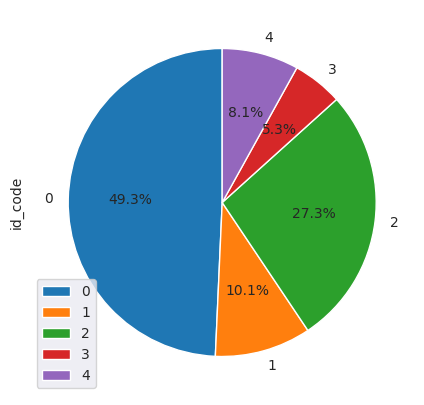

In [ ]:
df=pd.read_csv("/content/train.csv")
dfg=df.groupby(['diagnosis']).count()
dfg.plot.pie(y="id_code",figsize=(5,5),autopct='%1.1f%%',startangle=90)
plt.show()

In [ ]:
test_ratio = 0.20

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 150, 150, 3)
Test images: (733, 150, 150, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

cnn_model=Sequential()
cnn_model.add(Conv2D(16, (3, 3),activation='relu',input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(32, (3, 3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(64, (3, 3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())   #Features Are Extracted From this Layer
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(5, activation='sigmoid'))

opt = Adam(learning_rate=INIT_LR)
cnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,448,357 (5.53 MB)

 Trainable params: 1,447,845 (5.52 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# train the head of the network
print("[INFO] training head..")
h = cnn_model.fit(x_train,y_train,epochs=EPOCHS,validation_split=0.1,verbose=1, batch_size=32)
print("Done !!")

[INFO] training head..
Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 65s 748ms/step - accuracy: 0.6035 - loss: 0.3744 - val_accuracy: 0.5154 - val_loss: 0.5541
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 752ms/step - accuracy: 0.6931 - loss: 0.2694 - val_accuracy: 0.3481 - val_loss: 0.7532
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 768ms/step - accuracy: 0.7185 - loss: 0.2513 - val_accuracy: 0.6792 - val_loss: 0.3412
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 61s 741ms/step - accuracy: 0.7286 - loss: 0.2425 - val_accuracy: 0.5085 - val_loss: 2.1723
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 740ms/step - accuracy: 0.7411 - loss: 0.2376 - val_accuracy: 0.6246 - val_loss: 0.3562
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 745ms/step - accuracy: 0.7609 - loss: 0.2186 - val_accuracy: 0.6451 - val_loss: 0.4549
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 745ms/step - accuracy: 0.7696 - loss: 0.2125 - val_accuracy: 0.4881 - val_loss: 2.9429
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 84s 767ms/step - accuracy: 0.7663 - 

In [ ]:
!pip install scikit-plot


In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
!pip install --upgrade scikit-plot

[INFO] evaluating network...
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step

Trainig Accuracy Score:- 59.9863434619324

Testing Accuracy Score:- 56.480218281036834

Traning Graph:- 
 


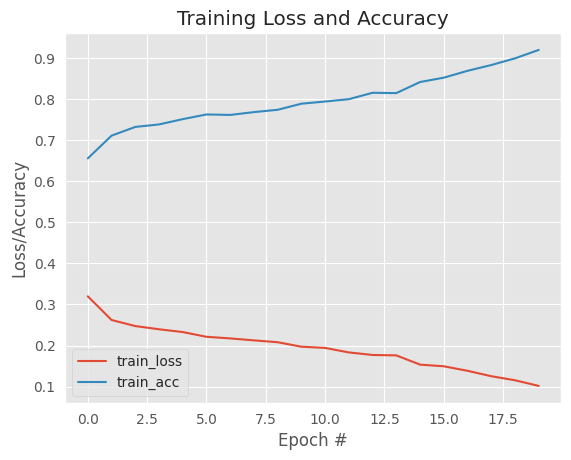

In [ ]:
#!pip install scikit-plot
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
#import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics

print("[INFO] evaluating network...")
predIdxs = cnn_model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = cnn_model.predict(x_train, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainCNNScore=accuracy_score(trainpredIdxs,np.argmax(y_train,axis=1))*100
CNNScore=accuracy_score(predIdxs,np.argmax(y_test,axis=1))*100

print("\nTrainig Accuracy Score:-",trainCNNScore)
print("\nTesting Accuracy Score:-",CNNScore)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

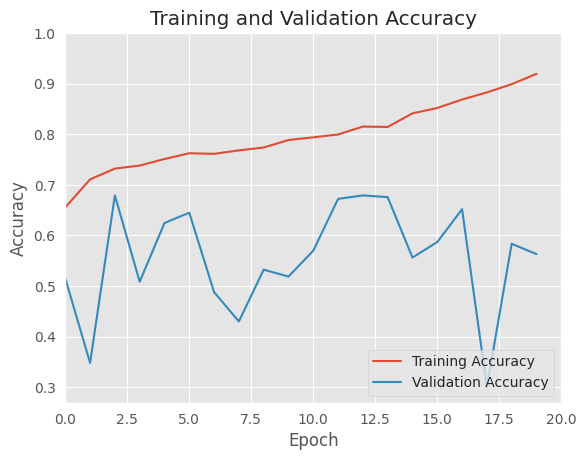

In [ ]:
acc =  h.history["accuracy"]
val_acc = h.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,20])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
pred = cnn_model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step
              precision    recall  f1-score   support

           0       0.88      0.11      0.19        66
           1       1.00      0.01      0.02       206
           2       0.87      0.98      0.92       359
           3       0.17      0.85      0.28        62
           4       0.00      0.00      0.00        40

    accuracy                           0.56       733
   macro avg       0.58      0.39      0.28       733
weighted avg       0.80      0.56      0.50       733



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test_new, pred)
cm

array([[  7,   0,   8,  51,   0],
       [  1,   2,  32, 170,   1],
       [  0,   0, 352,   7,   0],
       [  0,   0,   9,  53,   0],
       [  0,   0,   4,  36,   0]])

In [ ]:
extractCNN = Model(cnn_model.inputs, cnn_model.layers[-4].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)
feat_testCNN = extractCNN.predict(x_test)

print(feat_trainCNN.shape)

92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step
(2929, 1024)


In [ ]:
#Training Machine Learning Classifier
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

y_pred = svm.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)

print(classification_report(np.argmax(y_test,axis=1),y_pred))

SVM Training Accuracy Score:- 80.57357459883919

SVM Testing Accuracy Score:- 75.17053206002728

Confusion Metrics 
 [[ 29  29   8   0   0]
 [ 11 172  22   0   1]
 [  3   6 350   0   0]
 [  6  50   6   0   0]
 [  3  33   4   0   0]]
              precision    recall  f1-score   support

           0       0.56      0.44      0.49        66
           1       0.59      0.83      0.69       206
           2       0.90      0.97      0.93       359
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        40

    accuracy                           0.75       733
   macro avg       0.41      0.45      0.42       733
weighted avg       0.66      0.75      0.70       733



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'gini',random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)
y_pred = clf.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)
print(classification_report(np.argmax(y_test,axis=1),y_pred))

Decision Tree Training Accuracy Score:- 99.283031751451

Decision Tree Testing Accuracy Score:- 63.710777626193725

Confusion Metrics 
 [[ 30  26   6   2   2]
 [ 23 106  30  30  17]
 [ 13  22 310  11   3]
 [  8  30   5  13   6]
 [  4  16   7   5   8]]
              precision    recall  f1-score   support

           0       0.38      0.45      0.42        66
           1       0.53      0.51      0.52       206
           2       0.87      0.86      0.86       359
           3       0.21      0.21      0.21        62
           4       0.22      0.20      0.21        40

    accuracy                           0.64       733
   macro avg       0.44      0.45      0.45       733
weighted avg       0.64      0.64      0.64       733



In [ ]:
#K-Nearest Neighbor(KNN)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric = 'euclidean')
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

y_pred = knn.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)
print(classification_report(np.argmax(y_test,axis=1),y_pred))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c3be29cd480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so: cannot open shared object file: No such file or directory


KNN Training Accuracy Score:- 83.68043700921817

KNN Testing Accuracy Score:- 72.03274215552524

Confusion Metrics 
 [[ 33  19   8   6   0]
 [ 36 138  24   5   3]
 [  0  12 346   1   0]
 [ 14  34   7   7   0]
 [  7  23   4   2   4]]
              precision    recall  f1-score   support

           0       0.37      0.50      0.42        66
           1       0.61      0.67      0.64       206
           2       0.89      0.96      0.93       359
           3       0.33      0.11      0.17        62
           4       0.57      0.10      0.17        40

    accuracy                           0.72       733
   macro avg       0.55      0.47      0.47       733
weighted avg       0.70      0.72      0.69       733



In [ ]:
#Random Forset

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(feat_trainCNN,np.argmax(y_train,axis=1))
TrainRFScoreCNN=classifier.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("random forest Training Accuracy Score:-",TrainRFScoreCNN)

TestRFScoreCNN=classifier.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nrandom forestTesting Accuracy Score:-",TestRFScoreCNN)

y_pred = classifier.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)
print(classification_report(np.argmax(y_test,axis=1),y_pred))

random forest Training Accuracy Score:- 98.42949812222601

random forestTesting Accuracy Score:- 72.3055934515689

Confusion Metrics 
 [[ 30  27   6   2   1]
 [ 24 146  25   6   5]
 [  3   9 346   1   0]
 [ 11  38   7   4   2]
 [  6  24   3   3   4]]
              precision    recall  f1-score   support

           0       0.41      0.45      0.43        66
           1       0.60      0.71      0.65       206
           2       0.89      0.96      0.93       359
           3       0.25      0.06      0.10        62
           4       0.33      0.10      0.15        40

    accuracy                           0.72       733
   macro avg       0.50      0.46      0.45       733
weighted avg       0.68      0.72      0.69       733



In [ ]:
#Summary
#CNN-svm model shows highest accuarcy followed closely by CNN-knn and CNN.

print("--Training Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(trainCNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TrainSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TrainDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TrainKNNScoreCNN))
print("CNN-RF Accuracy:- {:.2f} %".format(TrainRFScoreCNN))

print("\n--Testing Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(CNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TestSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TestDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TestKNNScoreCNN))
print("CNN-RF Accuracy:- {:.2f} %".format(TestRFScoreCNN))

--Training Accuracy..
CNN Accuracy:- 59.99 %
CNN-SVM Accuracy:- 80.57 %
CNN-DT Accuracy:- 99.28 %
CNN-KNN Accuracy:- 83.68 %
CNN-RF Accuracy:- 98.43 %

--Testing Accuracy..
CNN Accuracy:- 56.48 %
CNN-SVM Accuracy:- 75.17 %
CNN-DT Accuracy:- 63.71 %
CNN-KNN Accuracy:- 72.03 %
CNN-RF Accuracy:- 72.31 %
